### **Import the dataset**

In [90]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [85]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [87]:
print("the length of our dataset is ",len(digits.target))

the length of our dataset is  1797


In [91]:
# target values in the data
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [92]:
# images in the data
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

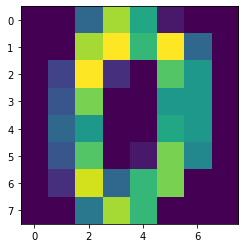

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0])

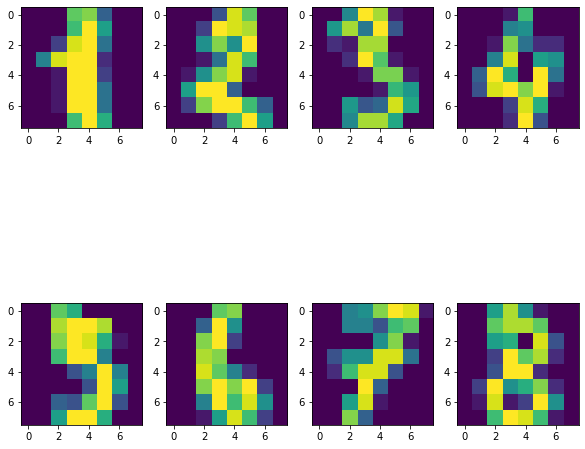

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(241)
plt.imshow(digits.images[1])
plt.subplot(242)
plt.imshow(digits.images[2])
plt.subplot(243)
plt.imshow(digits.images[3])
plt.subplot(244)
plt.imshow(digits.images[4])
plt.subplot(245)
plt.imshow(digits.images[5])
plt.subplot(246)
plt.imshow(digits.images[6])
plt.subplot(247)
plt.imshow(digits.images[7])
plt.subplot(248)
plt.imshow(digits.images[8])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [53]:
n_samples= len(digits.images)
x=digits.images.reshape(n_samples,-1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,digits.target)

In [89]:
print("size of train dataset is ",len(x_train))
print("size of test dataset is ",len(x_test))

size of train dataset is  1347
size of test dataset is  450


In [49]:
model=SVC(gamma=0.001,C=100.)

In [55]:
model.fit(x_train,y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred= model.predict(x_test)

In [57]:
model.score(x_test,y_test)

0.9911111111111112

In [64]:
y_pred[:10]

array([4, 8, 8, 5, 8, 4, 7, 0, 1, 2])

In [65]:
y_test[:10]

array([4, 8, 8, 5, 8, 4, 7, 0, 1, 2])

In [72]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        51
           5       0.96      0.98      0.97        49
           6       0.97      1.00      0.99        37
           7       0.98      1.00      0.99        45
           8       1.00      1.00      1.00        42
           9       1.00      0.95      0.98        44

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



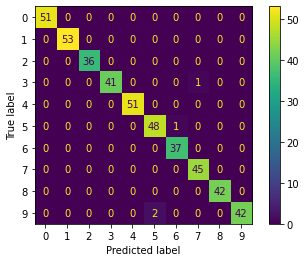

In [74]:
import seaborn as sns
plot_confusion_matrix(model,x_test,y_test)